In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.api as sm
import scipy.stats as stats

In [3]:
response = pd.read_csv("responses.txt",header=0,sep="\t")
response_104 = pd.read_csv("responses_104.txt",header=0,sep="\t")
response_quatitative = pd.read_csv("samples_DK210_IFNg.txt", sep="\t")

In [4]:
def calculate_threshold(x):
    if x[6] > x[5]:
        return x[6]
    else:
        return 0.75 * x[6] + 0.25 * x[5]

In [5]:
response_quatitative['Threshold'] = response_quatitative.apply(calculate_threshold, axis=1)

In [6]:
response = pd.merge(response, response_quatitative[['Sample','Threshold']], how='left')
response_104 = pd.merge(response_104, response_quatitative[['Sample','Threshold']], how='left')

In [7]:
genotypes = pd.read_csv("samples_gt.txt",header=None,sep="\t")
genotypes = genotypes.T
genotypes_104 = pd.read_csv("samples_gt_104.txt",header=None,sep="\t")
genotypes_104 = genotypes_104.T
variants = pd.read_csv('differential_variants.txt', header=None, sep="\t")
variants['ID'] = variants.astype(str).agg('_'.join, axis = 1)
variants.ID = 'chr'+variants.ID
genotypes.columns = ['Sample'] + list(variants.ID)
genotypes_104.columns = ['Sample'] + list(variants.ID)

In [8]:
def convert_genotype(x):
    x = x.str.split('/', expand=True)
    x = x[0].astype(int) + x[1].astype(int)
    return x

Index(['Sample', 'chr1_1020217_G_T', 'chr1_1534218_C_G', 'chr1_1534219_G_C',
       'chr1_1715541_A_C', 'chr1_12104380_C_T', 'chr1_46364585_C_T',
       'chr1_67340123_G_T', 'chr1_67345297_C_A', 'chr1_67350032_A_G',
       ...
       'chr19_1049306_C_A', 'chr19_23358866_G_A', 'chr19_39434416_A_G',
       'chr19_43479588_T_C', 'chr20_17962343_T_C', 'chr20_46406593_G_C',
       'chr22_30375565_T_G', 'chr22_30662798_T_C', 'chr22_36149522_T_C',
       'chrX_48578630_T_C'],
      dtype='object', length=111)

In [13]:
genotypes = genotypes.set_index('Sample')
genotypes_104 = genotypes_104.set_index('Sample')
genotypes = genotypes.apply(convert_genotype)
genotypes_104 = genotypes_104.apply(convert_genotype)

In [14]:
genotypes = pd.merge(response,genotypes, left_on='Sample', right_index=True)
genotypes_104 = pd.merge(response_104, genotypes_104, left_on='Sample', right_index=True, how='left')

In [16]:
genotypes_104.head()

,Sample,Response,Threshold,chr1_1020217_G_T,chr1_1534218_C_G,chr1_1534219_G_C,chr1_1715541_A_C,chr1_12104380_C_T,chr1_46364585_C_T,chr1_67340123_G_T,...,chr19_1049306_C_A,chr19_23358866_G_A,chr19_39434416_A_G,chr19_43479588_T_C,chr20_17962343_T_C,chr20_46406593_G_C,chr22_30375565_T_G,chr22_30662798_T_C,chr22_36149522_T_C,chrX_48578630_T_C
0,HMN884943,High,16014.338654,0,1,1,2,0,0,0,...,1,0,0,0,0,1,2,0,0,2
1,HMN884944,Medium,11380.431596,2,0,0,2,0,2,0,...,0,0,1,0,0,1,0,0,2,0
2,HMN884945,High,53130.695326,0,0,0,2,0,0,0,...,1,0,0,0,1,0,0,0,2,0
3,HMN885667,High,14543.765920,0,0,0,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,HMN885668,Medium,9851.341942,1,0,0,2,0,0,0,...,1,0,0,0,0,0,0,0,2,0


In [18]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components=10)
pca = pca.fit(genotypes.iloc[:,3:])
genotypes_pca = pca.transform(genotypes.iloc[:,3:])
genotypes_104_pca = pca.transform(genotypes_104.iloc[:,3:])
genotypes_pca_all = pca.fit_transform(pd.concat([genotypes.iloc[:,3:], genotypes_104.iloc[:,3:]]))

In [20]:
pca.explained_variance_ratio_

array([0.11340287, 0.04726074, 0.04310916, 0.0377564 , 0.03374879,
       0.03005024, 0.02877196, 0.02744822, 0.0261803 , 0.0245418 ])

In [34]:
color = ['b' if r=='Low' else 'g' if r=='Intermediate' else 'r' for r in genotypes['Response']]
markers = ['o' if r=='Low' else '<' if r=='Intermediate' else '*' for r in genotypes['Response']]
res = {'b': 'Low Responders', 'g': 'Intermediate Responders', 'r': 'High Responders'}

color_104 = ['b' if r=='Low' else 'g' if r=='Medium' else 'r' for r in genotypes_104['Response']]
markers_104 = ['o' if r=='Low' else '<' if r=='Medium' else '*' for r in genotypes_104['Response']]

In [35]:
color = np.array(color)
markers = np.array(markers)

color_104 = np.array(color_104)
markers_104 = np.array(markers_104)

In [53]:
color_all = np.concatenate((color, color_104))

In [43]:
np.unique(color_104, return_counts=True)

(array(['b', 'g', 'r'], dtype='<U1'), array([ 3, 29, 66], dtype=int64))

Text(0.5, 1.0, 'PCA on 110 SNP/INDELs')

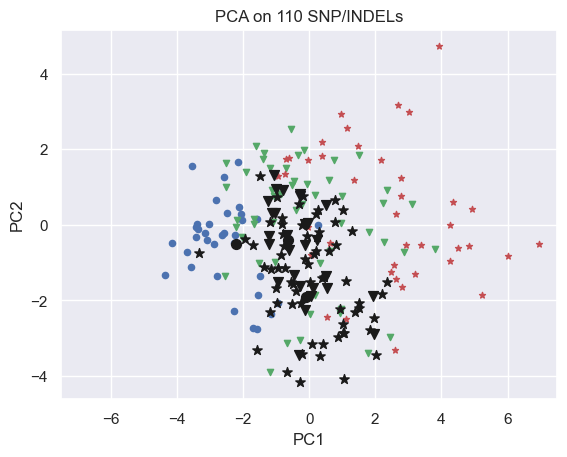

In [47]:
plt.scatter(genotypes_pca[color=='b',0], genotypes_pca[color=='b',1], c='b', marker='o', label=res['b'], s=20)
plt.scatter(genotypes_pca[color=='g',0], genotypes_pca[color=='g',1], c='g', marker='v', label=res['g'], s=20)
plt.scatter(genotypes_pca[color=='r',0], genotypes_pca[color=='r',1], c='r', marker='*', label=res['r'], s=20)
#plt.scatter(genotypes_pca[color=='b',0], genotypes_pca[color=='b',1], c='b', marker='o', s=genotypes.loc[color=='b','Threshold']/50, alpha=0.5)
#plt.scatter(genotypes_pca[color=='g',0], genotypes_pca[color=='g',1], c='g', marker='o', s=genotypes.loc[color=='g','Threshold']/50, alpha=0.5)
#plt.scatter(genotypes_pca[color=='r',0], genotypes_pca[color=='r',1], c='r', marker='o', s=genotypes.loc[color=='r','Threshold']/50, alpha=0.5)

plt.scatter(genotypes_104_pca[color_104=='b',0], genotypes_104_pca[color_104=='b',1], c='k', marker='o', s=50)
plt.scatter(genotypes_104_pca[color_104=='g',0], genotypes_104_pca[color_104=='g',1], c='k', marker='v', s=50)
plt.scatter(genotypes_104_pca[color_104=='r',0], genotypes_104_pca[color_104=='r',1], c='k', marker='*', s=50)

#plt.legend()
plt.xlim(-7.5,7.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA on 110 SNP/INDELs')
#plt.savefig("PCA_110_SNP_INDELs.pdf")

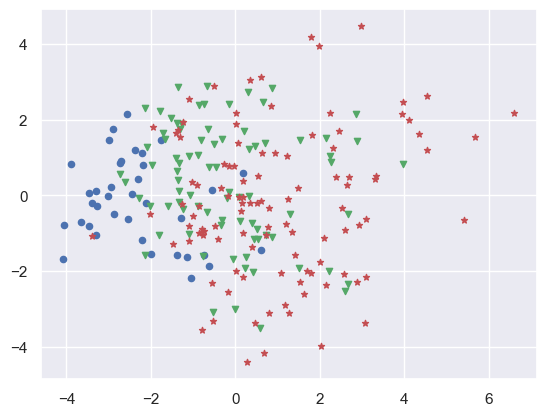

In [54]:
plt.scatter(genotypes_pca_all[color_all=='b',0], genotypes_pca_all[color_all=='b',1], c='b', marker='o', label=res['b'], s=20)
plt.scatter(genotypes_pca_all[color_all=='g',0], genotypes_pca_all[color_all=='g',1], c='g', marker='v', label=res['g'], s=20)
plt.scatter(genotypes_pca_all[color_all=='r',0], genotypes_pca_all[color_all=='r',1], c='r', marker='*', label=res['r'], s=20)